In [ ]:
### Make sure these are installed
!pip install plotly
!pip install "jupyterlab>=3" "ipywidgets>=7.6
!pip install jupyter-dash
!pip install pandas
### You may need to restart jupyter lab for the changes to take effect

In [1]:
import numpy as np 
import pandas as pd
import plotly.graph_objects as go

In [22]:
def evaluate(allocated, student_dataset):
    #import data from csv and store on pandas dataframe
    allocate = pd.read_csv(allocated)
    dataset = pd.read_csv(student_dataset)
    room_data = pd.read_csv('data/raw/final_room_data.csv')

    total_room = room_data['room_id'].count()
    match_pref = 0
    numOfgot = 0
    total = allocate['Assigned Rooms'].count()
    total_student = dataset['name'].count()

    total_fre = dataset['student_year'].value_counts()['Freshman']
    total_acc = dataset['accessibility_need'].value_counts()[1]
    total_inc = dataset['low_income_status'].value_counts()[1]

    got_acc = 0
    got_inc = 0

    got_fre = 0

    pre_acc = 0
    pre_inc = 0

    pre_fre = 0

    unit = len(allocate['Assigned Rooms'].value_counts())

    visited = []

    assigned_room = 0
    visited_room = []


    allo = -1
    for a in allocate['RUID']:
        allo += 1
        room_info = allocate.loc[allo,'Assigned Rooms']
        if(room_info != '[]'):
            building = room_info.split(",")[0]
            roomid = room_info.split(",")[2]
            row = -1
            for b in dataset['RUID']:
                row += 1
                if a == b:
                    if dataset.loc[row,'student_year'] == 'Freshman':
                        got_fre += 1
                        if building in dataset.loc[row, 'preferred_hall_ids']:
                            pre_fre += 1
                    if dataset.loc[row, 'accessibility_need'] == 1:
                        got_acc += 1
                        if building in dataset.loc[row, 'preferred_hall_ids']:
                            pre_acc += 1
                    if dataset.loc[row, 'low_income_status'] == 1:
                        got_inc += 1
                        if building in dataset.loc[row, 'preferred_hall_ids']:
                            pre_inc += 1
                    if building in dataset.loc[row, 'preferred_hall_ids']:
                        match_pref += 1

    got_room = total / total_student
    got_pre = match_pref / total_student


    need_got = got_acc / total_acc
    income_got = got_inc / total_inc
    fir_got = got_fre / total_fre
    need_pre = pre_acc / total_acc
    income_pre = pre_inc / total_inc
    fir_pre = pre_fre / total_fre

    per_unit = unit / total_room

    fig = go.Figure(data=go.Scatterpolar(
      r=[got_room, got_pre, need_got, income_got, fir_got, need_pre, income_pre, fir_pre, per_unit],
      theta=['percentage of assigned rooms for all students','percentage of assigned rooms that match all their preference for all students',
             'percentage of accessibility need students assigned a room', 'percentage of low income status students assigned a room',
               'percentage of 1st year students assigned a room','percentage of assigned rooms that match all their preference for accessibility need students',
             'percentage of low income status students assigned a room that match all their preference for all students',
               'percentage of 1st year students assigned a room that match all their preference for all students', 'percentage of assigned rooms'],
      fill='toself'
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True
        ),
      ),
      showlegend=False
    )

    fig.show()

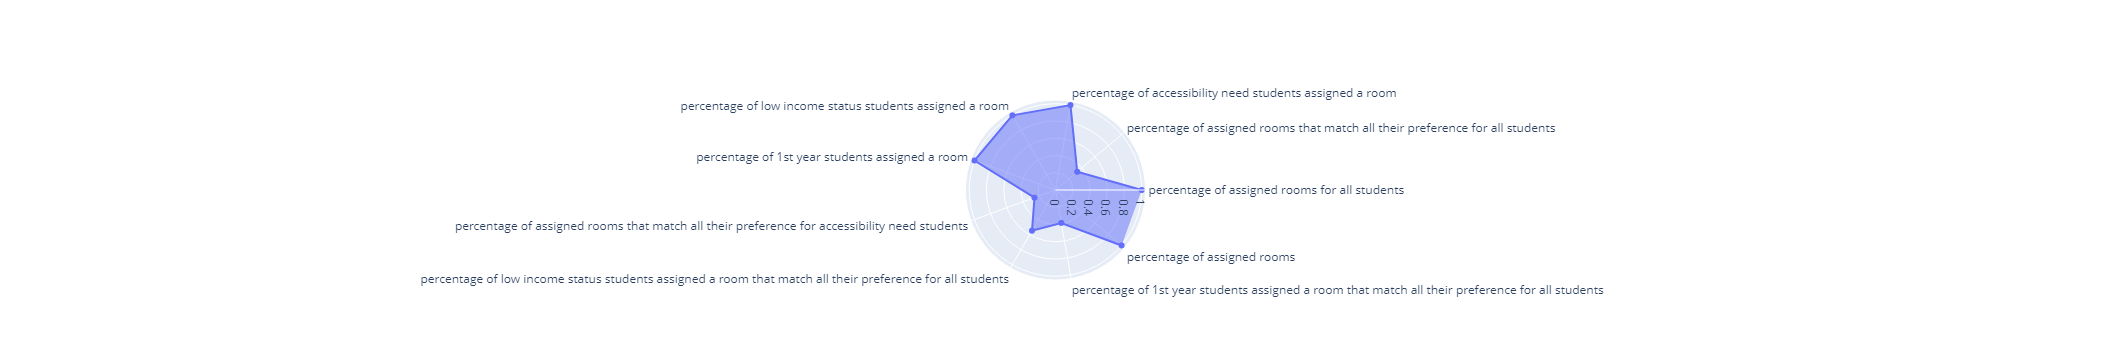

In [23]:
evaluate('data/processed/allocated1A.csv','data/raw/datasetA_with_roommate_pref.csv')

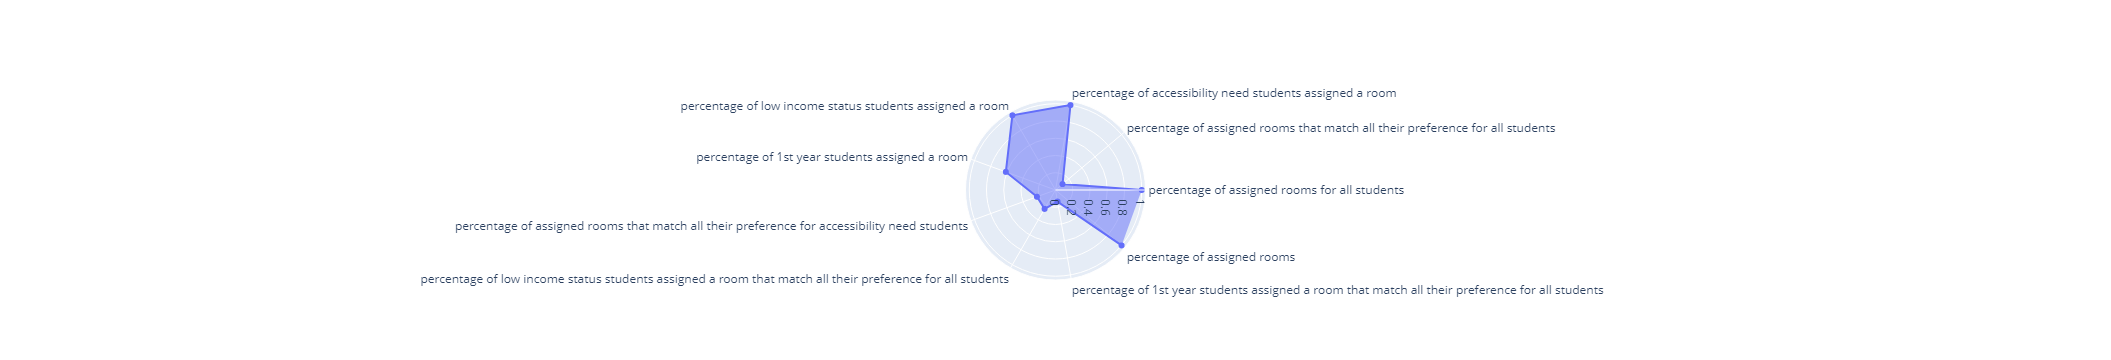

In [24]:
evaluate('data/processed/allocated1B.csv','data/raw/datasetB_with_roommate_pref.csv')

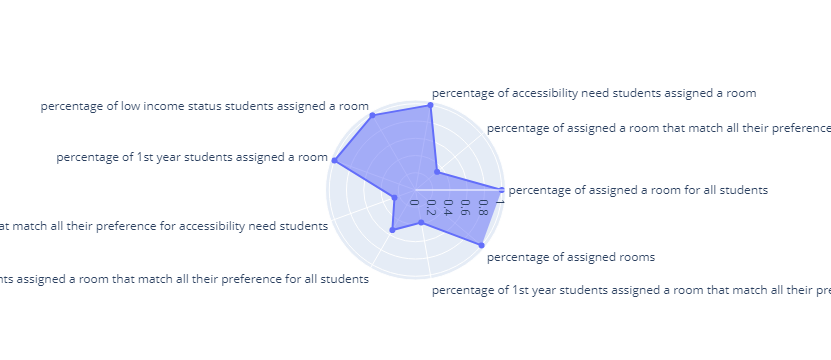

In [18]:
evaluate('data/processed/allocated2A.csv','data/raw/datasetA_with_roommate_pref.csv')

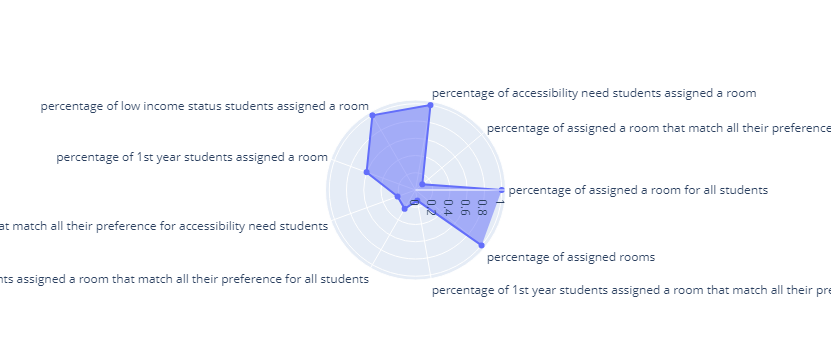

In [19]:
evaluate('data/processed/allocated2B.csv','data/raw/datasetB_with_roommate_pref.csv')

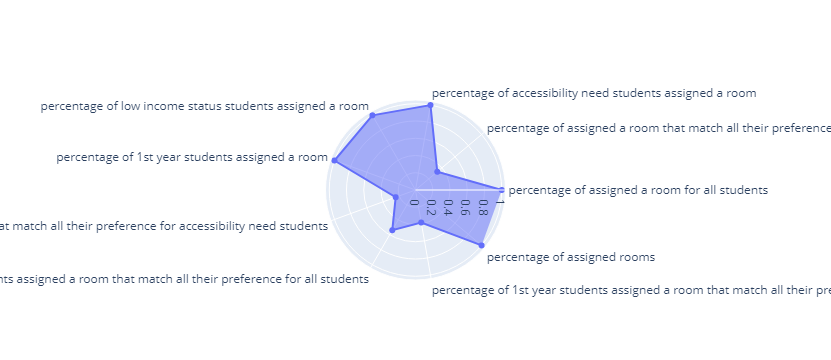

In [20]:
evaluate('data/processed/allocated3A.csv','data/raw/datasetA_with_roommate_pref.csv')

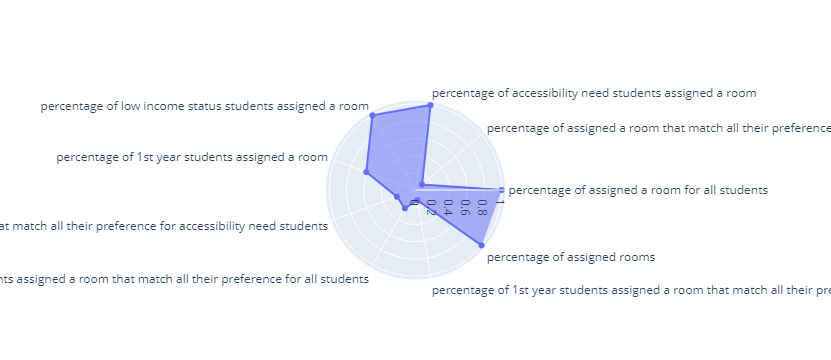

In [21]:
evaluate('data/processed/allocated3B.csv','data/raw/datasetB_with_roommate_pref.csv')